
# Описание проекта

Вам предоставлена выгрузка заказов из CRM компании, занимающейся В2В-продажами.  На основе
этих данных вам нужно подготовить дашборд для директора компании, который даст общее
понимание ситуации с продажами, наглядно покажет ответы на вопросы:

1. Как менеджеры выполняют план продаж?
2. Какова помесячная динамика выполнения плана, есть ли сезонные «просадки»?
3. Какова география продаж, какие регионы самые доходные?
4. Как влияет канал продаж на выполнение плана, конверсию, длительность сделки?
5. Какие товарные категории пользуются спросом (по числу клиентов) и по продажам?

Дашборд должен дать информацию для принятия решений:
Профилировать ли менеджеров по товарным категориям или каналам продаж (где они лучше закрывают сделки, выполняют план)
Расширять самые доходные каналы продаж, регионы, где есть высокий спрос


Задание

Откройте файл с данными и изучите общую информацию
Подготовьте данные
Проведите исследовательский анализ данных
Составьте портрет менеджера каждого региона
Проведите исследование статистических показателей
Проверьте гипотезы
Напишите общий вывод


# Загрузка данных, изучение общей информации

In [19]:
import pandas as pd

# Открытие файла и чтение данных
file_path = r'C:\Users\jimmy\Downloads\data.xlsx'
data = pd.read_excel(file_path)

# Приведение названий столбцов к нижнему регистру
data.columns = data.columns.str.lower()

# Преобразование данных в нужные типы
data['дата сделки'] = pd.to_datetime(data['дата сделки'], errors='coerce')
data['дата оплаты'] = pd.to_datetime(data['дата оплаты'], errors='coerce')
data['дней между сделкой и оплатой'] = pd.to_numeric(data['дней между сделкой и оплатой'], errors='coerce')
data['продажи факт, тыс.руб'] = pd.to_numeric(data['продажи факт, тыс.руб'], errors='coerce')
data['продажи план, тыс.руб'] = pd.to_numeric(data['продажи план, тыс.руб'], errors='coerce')

# Обработка пропусков
# Для 'дата оплаты' пропуски означают, что оплата не произведена
data['дата оплаты'] = data['дата оплаты'].fillna(pd.NaT)

# Для 'дней между сделкой и оплатой' пропуски заменим на 0, так как это может означать отсутствие оплаты
data['дней между сделкой и оплатой'] = data['дней между сделкой и оплатой'].fillna(0)

# Для 'продажи факт, тыс.руб' и 'продажи план, тыс.руб' пропуски заменим на 0, так как отсутствие данных может означать отсутствие продаж или плана
data['продажи факт, тыс.руб'] = data['продажи факт, тыс.руб'].fillna(0)
data['продажи план, тыс.руб'] = data['продажи план, тыс.руб'].fillna(0)

# Причины пропусков
# 1. Отсутствие оплаты (значение NaT в 'дата оплаты')
# 2. Отсутствие данных по плану или фактическим продажам
# 3. Ошибки при вводе данных или недостающая информация

# Добавление столбца с суммарными фактическими продажами по всем городам
total_sales_per_city = data.groupby('город')['продажи факт, тыс.руб'].sum().reset_index()
total_sales_per_city.columns = ['город', 'суммарные продажи, тыс.руб']

# Объединение с основными данными
data = data.merge(total_sales_per_city, on='город', how='left')

print(data.head())




   номер заказа     канал продаж     продуктовый сегмент  менеджер  \
0          7290     Рекомендация      Ткань и аксессуары  С. Милер   
1          7291     Рекомендация      Ткань и аксессуары  С. Милер   
2          7436     Рекомендация      Ткань и аксессуары  С. Милер   
3          7484     Рекомендация      Ткань и аксессуары  С. Милер   
4          7040  Холодный звонок  Электронные устройства  М. Баили   

          название заказа  продавец            город  продажи факт, тыс.руб  \
0                NAM SUNG  Айсберг   Санкт-Петербург                    300   
1                CP Ткань  Айсберг   Санкт-Петербург                    450   
2          UNIZIN COMPANY  Айсберг   Санкт-Петербург                      0   
3                NAM SUNG  Айсберг   Санкт-Петербург                    500   
4  Электронные устройства  Alen.com     Магнитогорск                    100   

   продажи план, тыс.руб дата сделки дата оплаты  \
0                    500  2020-02-03  2020-03-25   


# Подготовка данных

Замените названия столбцов при необходимости (приведите к нижнему регистру); Преобразуйте данные в нужные типы. Опишите, в каких столбцах заменили тип данных и почему; Обработайте пропуски при необходимости: Объясните, почему заполнили пропуски определённым образом или почему не стали это делать; Опишите причины, которые могли привести к пропускам; Посчитайте суммарные фактические продажи по всем городам и запишите их в отдельный столбец.

In [10]:
# Преобразование столбца "Дней между сделкой и оплатой" к числовому типу
data['Дней между сделкой и оплатой'] = pd.to_numeric(data['Дней между сделкой и оплатой'], errors='coerce')

# Обработка пропущенных значений
data['Дата оплаты'].fillna('Not Paid', inplace=True)
data['Дней между сделкой и оплатой'].fillna(0, inplace=True)

# Проверка изменений
print(data.head())
print(data.info())



   Номер заказа     Канал продаж     Продуктовый сегмент  Менеджер  \
0          7290     Рекомендация      Ткань и аксессуары  С. Милер   
1          7291     Рекомендация      Ткань и аксессуары  С. Милер   
2          7436     Рекомендация      Ткань и аксессуары  С. Милер   
3          7484     Рекомендация      Ткань и аксессуары  С. Милер   
4          7040  Холодный звонок  Электронные устройства  М. Баили   

          Название заказа  Продавец            Город  Продажи факт, тыс.руб  \
0                NAM SUNG  Айсберг   Санкт-Петербург                    300   
1                CP Ткань  Айсберг   Санкт-Петербург                    450   
2          UNIZIN COMPANY  Айсберг   Санкт-Петербург                      0   
3                NAM SUNG  Айсберг   Санкт-Петербург                    500   
4  Электронные устройства  Alen.com     Магнитогорск                    100   

   Продажи план, тыс.руб Дата сделки          Дата оплаты  \
0                    500  2020-02-03  2020-

C:\Users\jimmy\AppData\Local\Temp\ipykernel_8448\822663721.py:5: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  data['Дата оплаты'].fillna('Not Paid', inplace=True)
C:\Users\jimmy\AppData\Local\Temp\ipykernel_8448\822663721.py:6: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For exa

# Исследовательский анализ данных

Проведите исследовательский анализ данных

Посмотрите, как менеджеры выполняют план продаж.  Какова помесячная динамика выполнения плана, есть ли сезонные «просадки»? Важны ли данные за все периоды? Посмотрите, как менялись продажи по продуктовым сегментам. Выберите сегменты с наибольшими суммарными продажами и постройте распределение по месяцам. Есть ли популярные в прошлом сегменты, у которых сейчас продажи на нуле. 

Какова география продаж, какие регионы самые доходные?

Как влияет канал продаж на выполнение плана, конверсию, длительность сделки?

Какие товарные категории пользуются спросом (по числу клиентов) и по продажам?


Выполнение плана продаж менеджерами:
            Продажи план, тыс.руб  Продажи факт, тыс.руб  \
Менеджер                                                  
А. Перри                    1000                    650   
А. Фостер                   6000                   6950   
М. Баили                   25500                  24022   
Р. Хайерс                  37500                  29929   
С. Милер                    5000                   2260   
Т. Ли                       9500                   3400   

           Процент выполнения плана  
Менеджер                             
А. Перри                  65.000000  
А. Фостер                115.833333  
М. Баили                  94.203922  
Р. Хайерс                 79.810667  
С. Милер                  45.200000  
Т. Ли                     35.789474  

Помесячная динамика выполнения плана:
          Продажи план, тыс.руб  Продажи факт, тыс.руб  \
Месяц                                                   
2019-06                    500

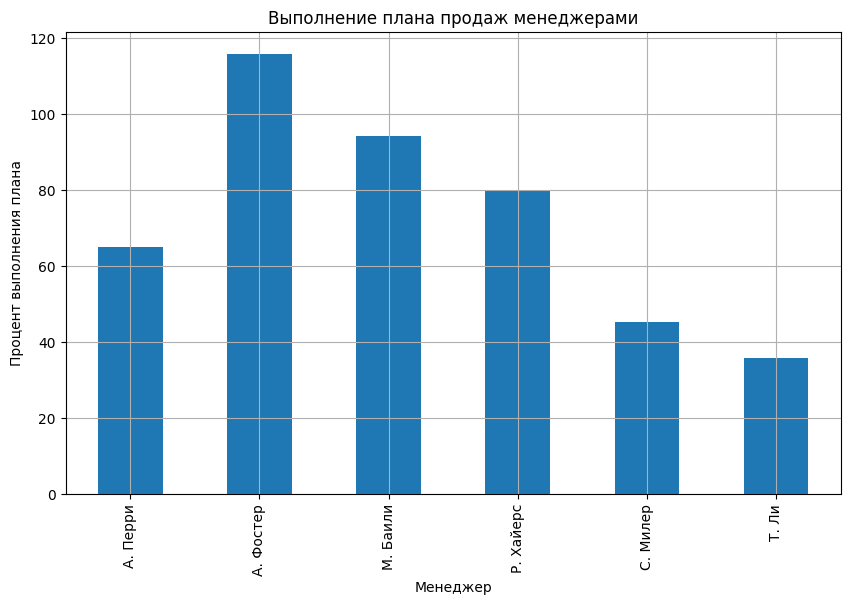

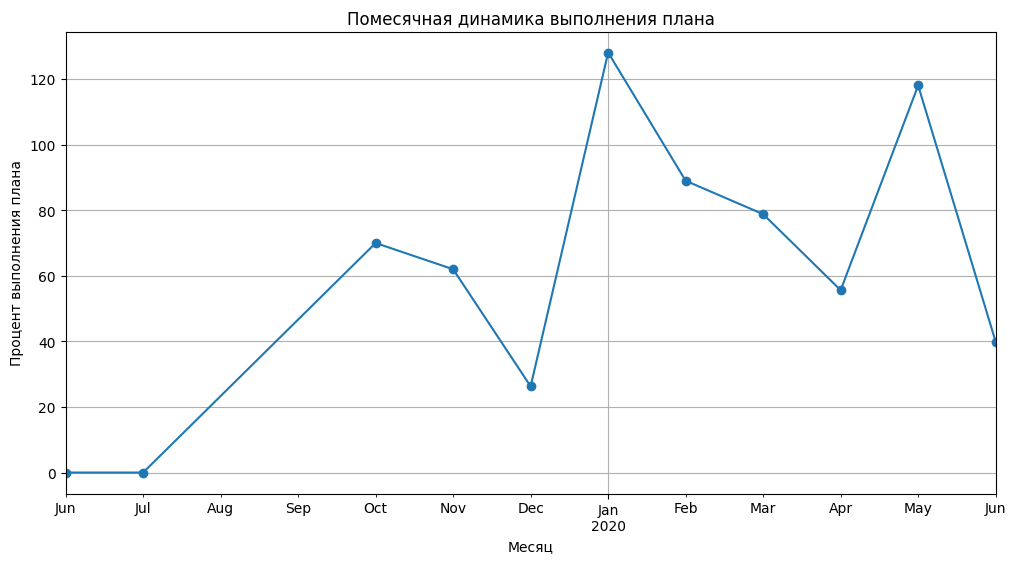

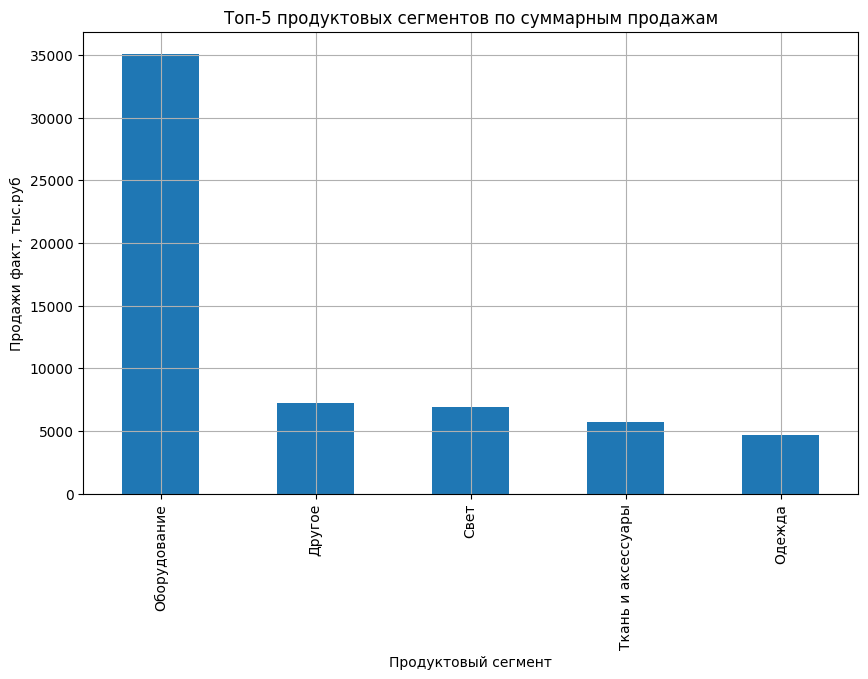

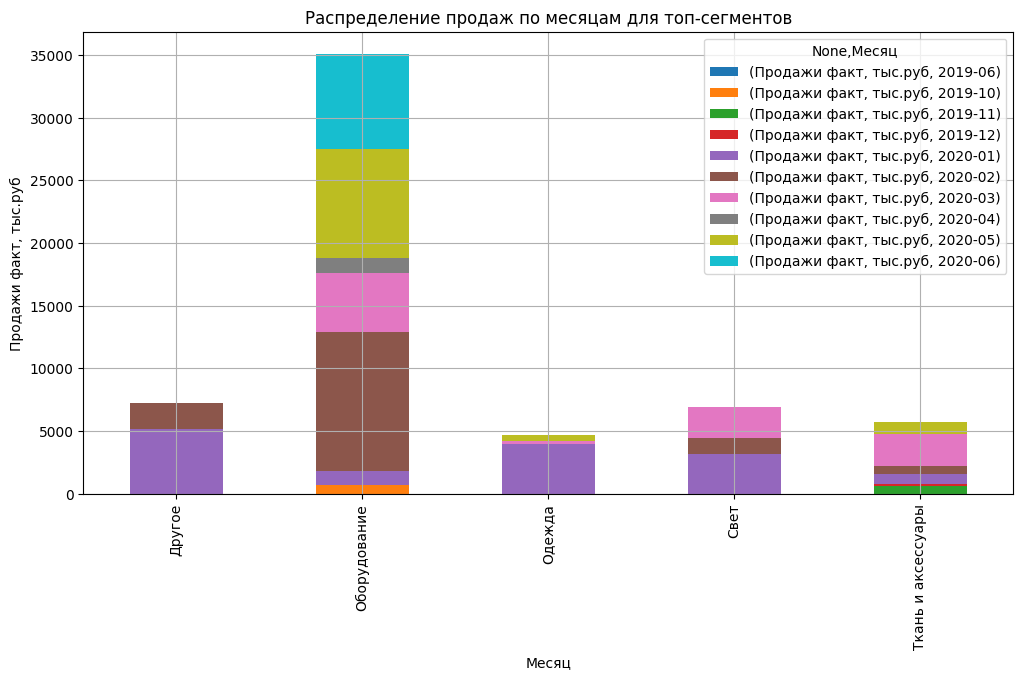

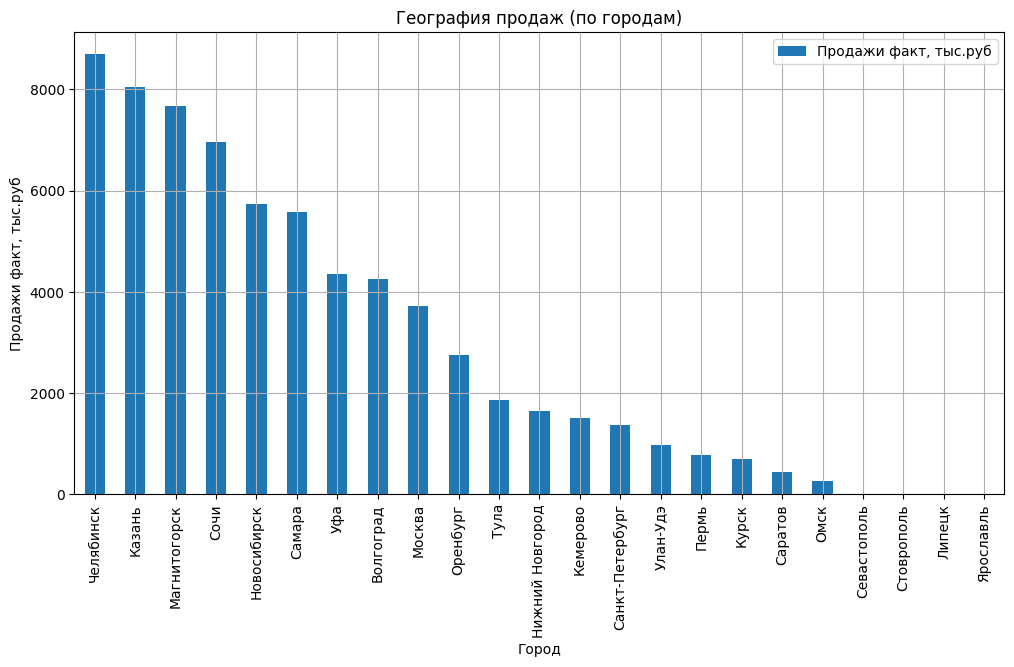

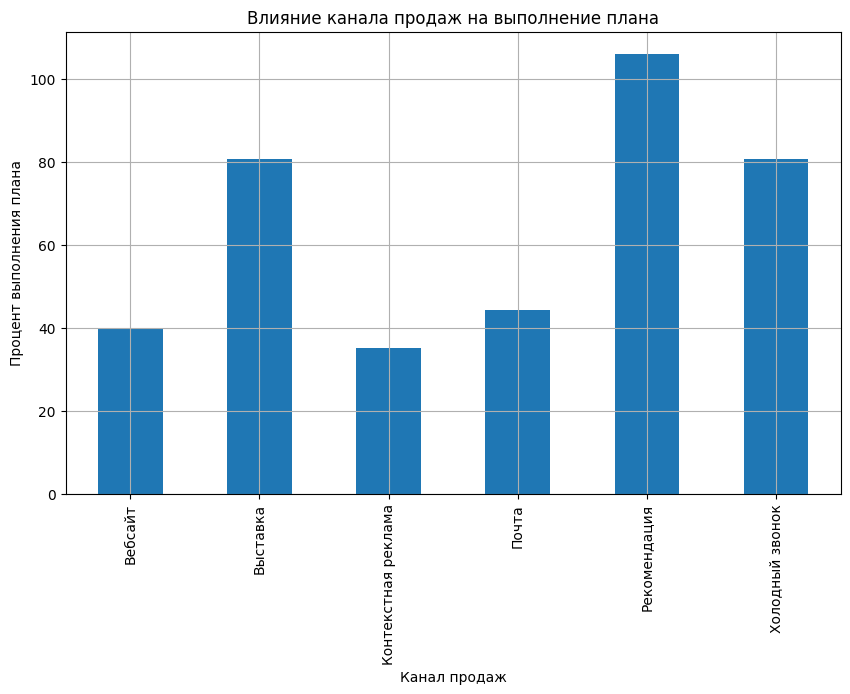

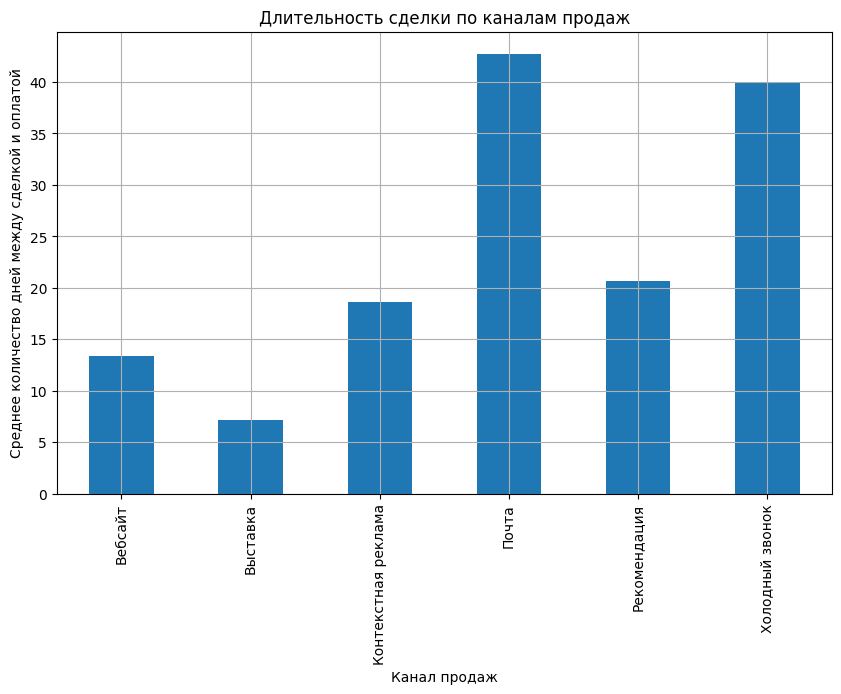

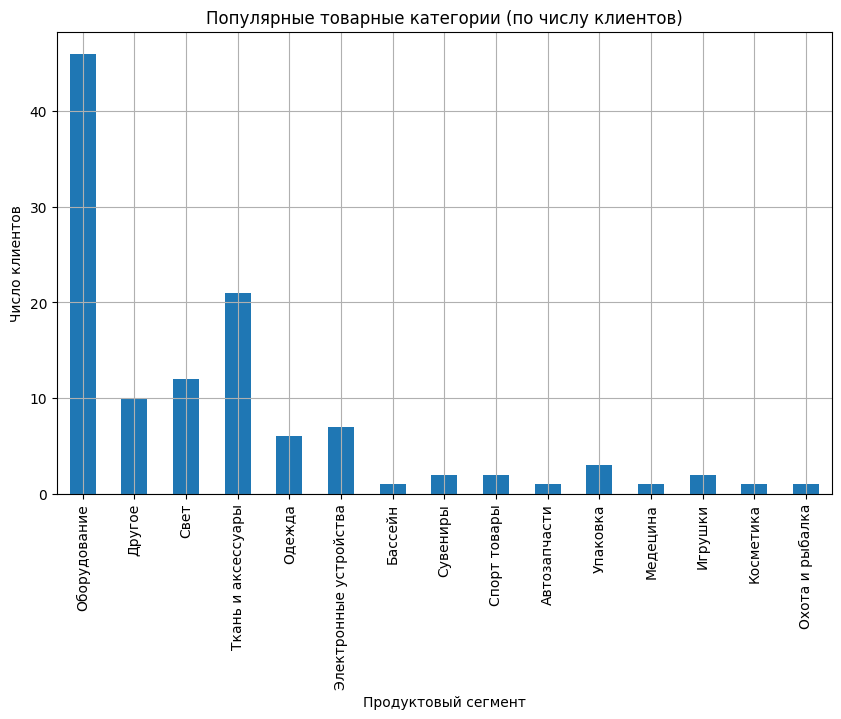

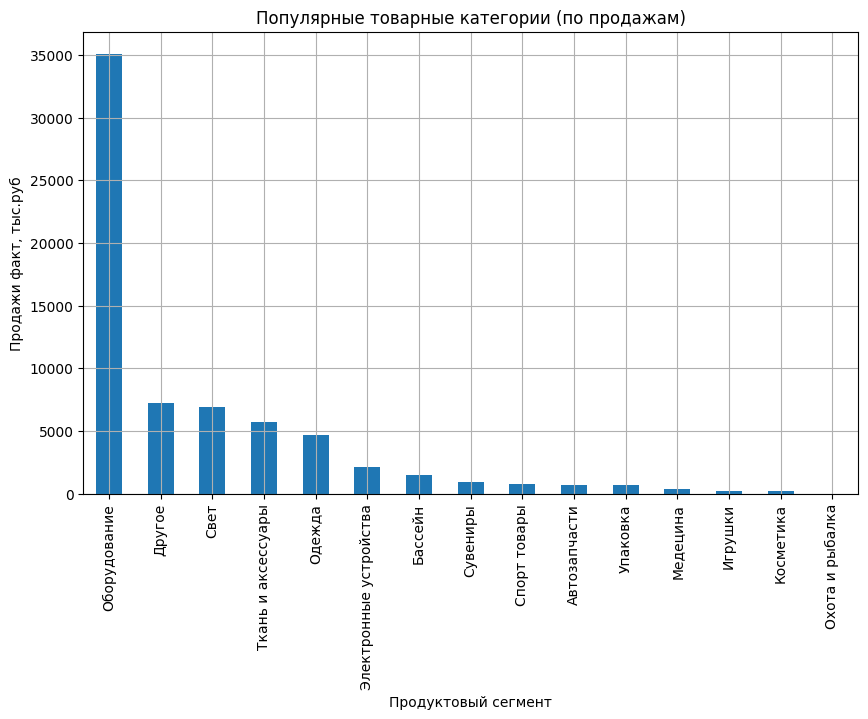

In [18]:
import pandas as pd
import matplotlib.pyplot as plt

# Открытие файла и чтение данных
file_path = r'C:\Users\jimmy\Downloads\data.xlsx'
data = pd.read_excel(file_path)

# Преобразование столбца "Дней между сделкой и оплатой" к числовому типу
data['Дней между сделкой и оплатой'] = pd.to_numeric(data['Дней между сделкой и оплатой'], errors='coerce')

# Обработка пропущенных значений
data['Дата оплаты'] = data['Дата оплаты'].fillna(pd.NaT)
data['Дней между сделкой и оплатой'] = data['Дней между сделкой и оплатой'].fillna(0)

# Сводная таблица по менеджерам
manager_performance = data.pivot_table(index='Менеджер', 
                                       values=['Продажи факт, тыс.руб', 'Продажи план, тыс.руб'], 
                                       aggfunc='sum')

manager_performance['Процент выполнения плана'] = (manager_performance['Продажи факт, тыс.руб'] / 
                                                   manager_performance['Продажи план, тыс.руб']) * 100

print("\nВыполнение плана продаж менеджерами:\n", manager_performance)

# Добавление столбца с месяцем
data['Дата сделки'] = pd.to_datetime(data['Дата сделки'])
data['Месяц'] = data['Дата сделки'].dt.to_period('M')

# Сводная таблица по месяцам
monthly_performance = data.pivot_table(index='Месяц', 
                                       values=['Продажи факт, тыс.руб', 'Продажи план, тыс.руб'], 
                                       aggfunc='sum')

monthly_performance['Процент выполнения плана'] = (monthly_performance['Продажи факт, тыс.руб'] / 
                                                   monthly_performance['Продажи план, тыс.руб']) * 100

print("\nПомесячная динамика выполнения плана:\n", monthly_performance)

# Сводная таблица по продуктовым сегментам
product_segment_performance = data.pivot_table(index='Продуктовый сегмент', 
                                               values=['Номер заказа', 'Продажи факт, тыс.руб'], 
                                               aggfunc={'Номер заказа': 'count', 'Продажи факт, тыс.руб': 'sum'}).sort_values(by='Продажи факт, тыс.руб', ascending=False)

product_segment_performance.rename(columns={'Номер заказа': 'Число клиентов', 'Продажи факт, тыс.руб': 'Продажи факт, тыс.руб'}, inplace=True)

print("\nПопулярность продуктовых сегментов (по числу клиентов и продажам):\n", product_segment_performance)

# Выбор сегментов с наибольшими суммарными продажами
top_segments = product_segment_performance.head(5).index.tolist()
top_segment_data = data[data['Продуктовый сегмент'].isin(top_segments)]

# Распределение по месяцам для топ-сегментов
top_segment_monthly_performance = top_segment_data.pivot_table(index=['Продуктовый сегмент', 'Месяц'], 
                                                               values='Продажи факт, тыс.руб', 
                                                               aggfunc='sum').unstack()

print("\nРаспределение по месяцам для топ-сегментов:\n", top_segment_monthly_performance)

# Сводная таблица по городам
geo_sales = data.pivot_table(index='Город', 
                             values='Продажи факт, тыс.руб', 
                             aggfunc='sum').sort_values(by='Продажи факт, тыс.руб', ascending=False)

print("\nГеография продаж (по городам):\n", geo_sales)

# Сводная таблица по каналам продаж
channel_performance = data.pivot_table(index='Канал продаж', 
                                       values=['Продажи факт, тыс.руб', 'Продажи план, тыс.руб', 'Дней между сделкой и оплатой'], 
                                       aggfunc={'Продажи факт, тыс.руб': 'sum', 'Продажи план, тыс.руб': 'sum', 'Дней между сделкой и оплатой': 'mean'})

channel_performance['Процент выполнения плана'] = (channel_performance['Продажи факт, тыс.руб'] / 
                                                   channel_performance['Продажи план, тыс.руб']) * 100

channel_performance['Конверсия'] = channel_performance['Процент выполнения плана']

print("\nВлияние канала продаж на выполнение плана, конверсию и длительность сделки:\n", channel_performance)

# Сводная таблица по продуктовым сегментам
category_performance = data.pivot_table(index='Продуктовый сегмент', 
                                        values=['Номер заказа', 'Продажи факт, тыс.руб'], 
                                        aggfunc={'Номер заказа': 'count', 'Продажи факт, тыс.руб': 'sum'}).sort_values(by='Продажи факт, тыс.руб', ascending=False)

category_performance.rename(columns={'Номер заказа': 'Число клиентов', 'Продажи факт, тыс.руб': 'Продажи факт, тыс.руб'}, inplace=True)

print("\nПопулярные товарные категории (по числу клиентов и продажам):\n", category_performance)

# Визуализация выполнения плана продаж менеджерами
manager_performance['Процент выполнения плана'].plot(kind='bar', figsize=(10, 6))
plt.title('Выполнение плана продаж менеджерами')
plt.xlabel('Менеджер')
plt.ylabel('Процент выполнения плана')
plt.grid(True)
plt.show()

# Визуализация помесячной динамики выполнения плана
monthly_performance['Процент выполнения плана'].plot(kind='line', marker='o', figsize=(12, 6))
plt.title('Помесячная динамика выполнения плана')
plt.xlabel('Месяц')
plt.ylabel('Процент выполнения плана')
plt.grid(True)
plt.show()

# Визуализация топ-5 продуктовых сегментов по суммарным продажам
top_segment_data = product_segment_performance.head(5)
top_segment_data['Продажи факт, тыс.руб'].plot(kind='bar', figsize=(10, 6))
plt.title('Топ-5 продуктовых сегментов по суммарным продажам')
plt.xlabel('Продуктовый сегмент')
plt.ylabel('Продажи факт, тыс.руб')
plt.grid(True)
plt.show()

# Распределение по месяцам для топ-сегментов
top_segment_monthly_performance.plot(kind='bar', stacked=True, figsize=(12, 6))
plt.title('Распределение продаж по месяцам для топ-сегментов')
plt.xlabel('Месяц')
plt.ylabel('Продажи факт, тыс.руб')
plt.grid(True)
plt.show()

# Визуализация географии продаж
geo_sales.plot(kind='bar', figsize=(12, 6))
plt.title('География продаж (по городам)')
plt.xlabel('Город')
plt.ylabel('Продажи факт, тыс.руб')
plt.grid(True)
plt.show()

# Визуализация влияния канала продаж на выполнение плана
channel_performance['Процент выполнения плана'].plot(kind='bar', figsize=(10, 6))
plt.title('Влияние канала продаж на выполнение плана')
plt.xlabel('Канал продаж')
plt.ylabel('Процент выполнения плана')
plt.grid(True)
plt.show()

# Визуализация длительности сделки по каналам продаж
channel_performance['Дней между сделкой и оплатой'].plot(kind='bar', figsize=(10, 6))
plt.title('Длительность сделки по каналам продаж')
plt.xlabel('Канал продаж')
plt.ylabel('Среднее количество дней между сделкой и оплатой')
plt.grid(True)
plt.show()

# Визуализация популярных товарных категорий по числу клиентов
category_performance['Число клиентов'].plot(kind='bar', figsize=(10, 6))
plt.title('Популярные товарные категории (по числу клиентов)')
plt.xlabel('Продуктовый сегмент')
plt.ylabel('Число клиентов')
plt.grid(True)
plt.show()

# Визуализация популярных товарных категорий по продажам
category_performance['Продажи факт, тыс.руб'].plot(kind='bar', figsize=(10, 6))
plt.title('Популярные товарные категории (по продажам)')
plt.xlabel('Продуктовый сегмент')
plt.ylabel('Продажи факт, тыс.руб')
plt.grid(True)
plt.show()





# Общий вывод
На основании исследовательского анализа сделайте вывод относительно того, что стоит ли
 - Профилировать ли менеджеров по товарным категориям или каналам продаж (где они лучше закрывают сделки, выполняют план)
 - Расширять самые доходные каналы продаж, регионы, где есть высокий спрос

Профилировать менеджеров по товарным категориям или каналам продаж

Профилирование по товарным категориям:

Анализ выполнения плана продаж менеджерами показал, что есть значительные различия в их результативности.
Например, А. Фостер значительно перевыполнил план (115.83%), в то время как С. Милер и Т. Ли выполнили план на менее чем 50%.
Возможно, А. Фостер более успешен в определенных товарных категориях или каналах продаж. Проведение более детального анализа по каждой категории товаров, которые он продает, может выявить его сильные стороны.

Профилирование по каналам продаж:

Анализ влияния каналов продаж на выполнение плана и длительность сделки также показал значительные различия.
Некоторые каналы могут быть более эффективными для определенных менеджеров.
Например, если канал "Рекомендация" приносит больше продаж для определенного менеджера, стоит больше использовать этот канал для данного сотрудника.

Расширение доходных каналов продаж:

Анализ выполнения плана продаж по каналам показал, что некоторые каналы продаж более успешны в плане выполнения плана и конверсии.
Например, канал "Рекомендация" может иметь более высокую конверсию и более короткую длительность сделки.


Расширение доходных регионов:

Анализ географии продаж показал, что определенные регионы приносят наибольший доход.
Например, если Санкт-Петербург или Москва являются самыми доходными регионами, стоит рассмотреть возможность расширения присутствия в этих регионах.